In [ ]:
#import the necessary packages
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [ ]:
!mkdir pan_card_tampering   # to make a directory
!mkdir pan_card_tampering/image   #and inside pan_card_tampering folder name image

mkdir: cannot create directory ‘pan_card_tampering’: File exists
mkdir: cannot create directory ‘pan_card_tampering/image’: File exists


In [ ]:
# Open image and display
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw)

In [ ]:
# The file format of the source file.
print("Original image format : ",original.format)
print("Tampered image format : ",tampered.format)

# Image size, in pixels. The size is given as a 2-tuple (width, height).
print("Original image size : ",original.size)
print("Tampered image size : ",tampered.size)

Original image format :  JPEG
Tampered image format :  PNG
Original image size :  (1200, 800)
Tampered image size :  (282, 179)


As seen above the size of the image size is differ , so now we save both the image into same format and same size.

In [ ]:
#Resize image
original = original.resize((250, 160))
print(original.size)
original.save('pan_card_tampering/image/original.png') #save image
tampered = tampered.resize((250, 160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png') #save image


(250, 160)
(250, 160)


So now , I will now display the original image and tampered image

In [ ]:
print("Original:\n", original)
print("Tampered:\n", tampered)

Original:
 <PIL.Image.Image image mode=RGB size=250x160 at 0x7AABC9465E70>
Tampered:
 <PIL.Image.Image image mode=RGBA size=250x160 at 0x7AABC9467700>


In [ ]:
# load the two input images with the help of cv2
original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

In [ ]:
# Convert these images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

Converting images into grayscale using opencv. Because in image processing many applications doesn't help us in identifying the important, edges of the coloured images also coloured images are bit complex to understand by machine beacuse they have 3 channel while grayscale has only 1 channel.

In [ ]:
# Compute the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.31686135690489126


1. Structure of the image is compared to other images and the difference between them is noted as the similarity difference score.
2. So the similarity score is around 31./.  
3. As, we can see that SSIM score is low so they are not similar to each other .

In [ ]:
# Calculating threshold and contours
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

1. So the threshold function of computer vision which applies an adaptive threshold to the image which is stored on the form of array.
2. So this function transform the grayscale image into a binary image.
3. Contours are a useful tool for shape analysis and recognition.

In [ ]:
#Creating a bounding rectangle of the image
for c in cnts:
    #apply contours on image (x,y width, height)
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)


Bounding rectangle helps in finding the ratio of width to height of bounding rectangle of the object.


Original Format Image-


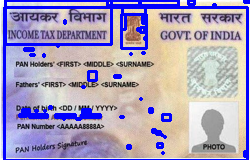

In [ ]:
#Diplay original image with the help contour i created.
print('Original Format Image-')
Image.fromarray(original)

For each and every part in the Pan card different bounding boxes.

Tampered Format Image-


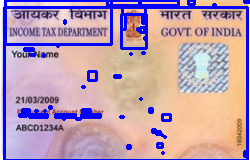

In [ ]:
#Display tampered image with the help contour
print('Tampered Format Image-')
Image.fromarray(tampered)

1. So, here it can see it is not much difference from the original but yet some differences in it.
2. So, we can see that contours didn't help us to see whether the images are similar or not.

Difference between the images- 


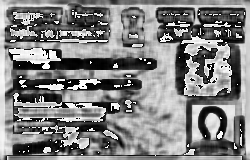

In [ ]:
# Now visulaize the differenc between the images with teh black
print("Difference between the images- ")
Image.fromarray(diff)

This black portion only difference between the images.

Threshold between the images- 


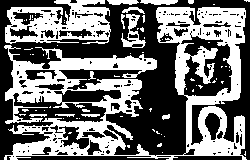

In [ ]:
# display threshold with white
print("Threshold between the images- ")
Image.fromarray(thresh)

1. So here we can see that the threshold  difference between the original and tampered is really high as seen in white portion.
2. As seen it has much difference.
3. So we can say that the images are not similar.

Conclusion-

So from both the difference image and the threshold image and the SSIM score we can conclude that the image that the user provided us that stored in the tampered variable it is actually a tampered image.